# CQSV Database for Calabi-Yau Reflection Orientifolds

This notebook provides instructions on how to read the data provided in our GitHub repository for Calabi-Yau (CY) orientifolds. More details on the type of data can be found in our paper which is available on the ArXiv: [https://arxiv.org/abs/2204.13115](https://arxiv.org/abs/2204.13115).

Author: Andreas Schachner

E-Mail: andreas.schachner@gmx.net


## Packages

We first load a few packages that are necessary to read the data and reproduce some of the figures in the paper:

In [1]:
import numpy as np
import os
import sys
import glob
import pandas as pd
import pickle
import gzip
import seaborn as sn
import matplotlib.pyplot as plt
from tqdm import tqdm

sn.set(rc={"figure.dpi":200, 'savefig.dpi':200})
sn.set_context('notebook')
sn.set_style("ticks")
plt.rcParams["font.family"] = "Times New Roman"
cmap=sn.color_palette("viridis", as_cmap=True)
sn.set_theme()

home_dir=os.getcwd()
        
def load_zipped_pickle(filen):
    
    with gzip.open(filen, 'rb') as f:
        loaded_object = pickle.load(f)
        
    f.close()
        
    return loaded_object


def mergeDict(dict1, dict2):
    
    dict3 = {**dict1, **dict2}
    for key, value in dict3.items():
        if key in dict1 and key in dict2:
            if np.issubdtype(type(dict1[key]), np.integer)==True:
                dict3[key] = [dict1[key],value]
            else:
                dict1[key].append(value)
                dict3[key] = dict1[key]
                
            
    return dict3


We provide all of the relevant CY data in a readily usable format. Depending on the application, it might however be necessary to work out additional data from the polytope and triangulation data. In this case, it is recommended to install the lastest version of [CYTools](https://cytools.liammcallistergroup.com) and to load the following packages afterwards:

In [2]:
import cytools
from cytools import Polytope


Info: A more recent version of CYTools is available: v0.5.0 -> v0.6.0.
We recommend upgrading before continuing.



Alternatively, the data can also be handled with [Sage](https://www.sagemath.org).

# Read orientifold data for a single polytope at given $h^{1,1}$

To read the data, we pick a value for $h^{1,1}$ and choose the type of data (see paper for more details):

* ```Complete```: Contains complete data for *all* fine, regular, star triangulations (FRSTs) of *all* favourable reflexive 4D polytopes at $2\leq h^{1,1}\leq 7$ listed in the [KS database](http://hep.itp.tuwien.ac.at/~kreuzer/CY/).
* ```Random```: Contains data obtained from random sampling FRSTs using the ```random_triangulations_fair``` function as implemented in [CYTools](https://cytools.liammcallistergroup.com/docs/documentation/polytope#random_triangulations_fair). We randomly selected favourable reflexive 4D polytopes at $7\leq h^{1,1}\leq 12$ with all possible values for $h^{1,2}$ as listed in the [KS database](http://hep.itp.tuwien.ac.at/~kreuzer/CY/).

Below, we work with the ```Complete``` data by setting ```random_data=0```:

In [3]:
h11=2
random_data=0

Next, we can find all the datafiles in the corresponding folder by using ```
glob.glob(files)
```:

In [4]:
file_ID="POLY_*"

if random_data==0:
    files = home_dir+"/Data/Complete/h11_"+str(h11)+"/"+file_ID+".p"
else:
    files = home_dir+"/Data/Random/h11_"+str(h11)+"/"+file_ID+".p"      
            
filenames = glob.glob(files)
filenames[:5]

['/home/cytools/mounted_volume/Software/CYTools_Projects/CY_Orientifold_database/Data/Complete/h11_2/POLY_10_h11_2_h12_86.p',
 '/home/cytools/mounted_volume/Software/CYTools_Projects/CY_Orientifold_database/Data/Complete/h11_2/POLY_11_h11_2_h12_86.p',
 '/home/cytools/mounted_volume/Software/CYTools_Projects/CY_Orientifold_database/Data/Complete/h11_2/POLY_12_h11_2_h12_86.p',
 '/home/cytools/mounted_volume/Software/CYTools_Projects/CY_Orientifold_database/Data/Complete/h11_2/POLY_13_h11_2_h12_86.p',
 '/home/cytools/mounted_volume/Software/CYTools_Projects/CY_Orientifold_database/Data/Complete/h11_2/POLY_14_h11_2_h12_86.p']

The list ```filenames``` contains all filenames for polytopes with a given h11. For convenience, we further limit ourselves to polytopes with a specified $h^{1,2}$:

In [5]:
h12=272
filenames=[file for file in filenames if "h12_"+str(h12) in file]
filenames

['/home/cytools/mounted_volume/Software/CYTools_Projects/CY_Orientifold_database/Data/Complete/h11_2/POLY_36_h11_2_h12_272.p']

We picked $h^{1,2}=272$ which corresponds to the degree 18 hypersurface in $\mathbb{CP}[1,1,1,6,9]$ as discussed in Appendix B in the paper. This leaves us with one filename which we now read in using the function ```load_zipped_pickle```:

In [6]:
if len(filenames)>0:
    filename=filenames[0]
else:
    print("No filename found!")
    sys.exit()
    
ptr=load_zipped_pickle(filename)

type(ptr)

dict

We loaded the file into a dictionary ```ptr``` which has the following keys:

In [7]:
ptr.keys()

dict_keys(['POLYID', 'KSID', 'h11', 'h12', 'chi', 'PPOINTS', 'WEIGHTS', 'FIBRE', 'SIMPS', 'SRI', 'INTNUMS', 'SCHERN', 'DIVS', 'DPEZ', 'OFOLDS', 'STAT'])

The keys provide access to the following data:
    
| Key | Quantity | Type | Length |
| --- | --- | --- | --- |
| **'POLYID'** | Polytope ID | scalar | 0 |
| **'KSID'** | Polytope ID | scalar | 0 |
| **'h11'** | $h^{1,1}(X_3)$ of the corresponding CY $X_3$ | scalar | 0 |
| **'h12'** | $h^{1,2}(X_3)$ of the corresponding CY $X_3$ | scalar | 0 |
| **'chi'** | $\chi(X_3)$ of the corresponding CY $X_3$ | scalar | 0 |
| **'PPOINTS'** | $N$ lattice points | array | h11+4 |
| **'WEIGHTS'** | GLSM weight matrix | array | h11+4 |
| **'FIBRE'** | Fiberation structre of the polytope | array | - |
| **'SIMPS'** | Simplices of all FRSTs | array | #FRSTs |
| **'SRI'** | SR-ideal for all FRSTs | array | #FRSTs |
| **'INTNUMS'** | Intersection numbers for all FRSTs | array | #FRSTs |
| **'SCHERN'** | 2nd Chern class for all FRSTs | array | #FRSTs |
| **'DIVS'** | Topological numbers of divisors for all FRSTs | array | #FRSTs |
| **'DPEZ'** | (Diagonal) del Pezzo divisors for all FRSTs | array | #FRSTs |
| **'OFOLDS'** | Orientifolds for all FRSTs | array | #FRSTs |
| **'STAT'** | Statistic for the polytope | dictionary | - |
    

The polytope ID is counted in the order of the original KS database. Non-favourable polytopes (which are currently NOT included in our database) are counted within ```KSID```. It corresponds to *'Polytope #'* in the CY database of Altmann et al. http://www.rossealtman.com/toriccy/.

The triangulation dependent arrays have length of the number of FRSTs. These are the simplices used for each FRST as well as the 2nd Chern class, SR ideal, triple intersection numbers, divisor topologies, del Pezzo divisors, and orientifolds.

The intersection numbers include the anti-canonical divisor at index 0.

For each polytope, ```STAT``` provides the statistic of orientifold models for all triangulations in form of another ```dictionary```. For the above, we find

In [8]:
ptr['STAT']

{'#INV': 4, '#SINV': 1, '#NSINV': 3, '#CO3s': 1, '#OO7s': 2}

Here, the different ```keys``` have the following interpretation:

| Key | Quantity | Type | Length |
| --- | --- | --- | --- |
| **'#INV'** | Number of involutions | scalar | 0 |
| **'#SINV'** | Number of singular involutions | scalar | 0 |
| **'#NSINV'** | Number of non-singular involutions | scalar | 0 |
| **'#CO3s'** | Number of orientifolds with coinciding O3-planes | scalar | 0 |
| **'#OO7s'** | Number of orientifolds with only O7-planes | scalar | 0 |

In the following, we look at the data of ```Orientifolds``` and ```Divisors``` where we need to specify a triangulation. Here, there is only one triangulation obtained via ```T=0```:

In [9]:
T=0
Orientifolds=ptr["OFOLDS"][T]
Divisors=ptr["DIVS"][T]

### The divisor data

Let us first look at the divisor data. The topological numbers read

In [10]:
Divisors

array([[1, list([1, 0, 2, 30]), 36, 144.0, 3.0],
       [2, list([1, 0, 2, 30]), 36, 144.0, 3.0],
       [3, list([1, 0, 2, 30]), 36, 144.0, 3.0],
       [4, list([1, 0, 28, 218]), 276, 5424.0, 29.0],
       [5, list([1, 0, 65, 417]), 549, 16776.0, 66.0],
       [6, list([1, 0, 0, 1]), 3, 552.0, 1.0]], dtype=object)

There are 5 columns which encode the following quantities

| Column | Quantity | Type | Length |
| --- | --- | --- | --- |
| 1 | Divisor/coordinate index $i$ for $D_i=\lbrace z_i=0\rbrace$ | scalar | 0 |
| 2 | Hodge numbers $h^{p,q}(D_i)$ in the format $[h^{0,0},h^{0,1}, h^{0,2},h^{1,1}]$ | list | 4 |
| 3 | Euler number $\chi(D_i)$ | scalar | 0 |
| 4 | Euler number $\chi(4D_i)$ | scalar | 0 |
| 5 | Arithmetic genus $\chi_0(D_i)$ | scalar | 0 |

As an example, let us take look at the divisor $D_6$

In [11]:
D=5
D6=Divisors[D]
D6

array([6, list([1, 0, 0, 1]), 3, 552.0, 1.0], dtype=object)

This divisors has the following properties: 

* It corresponds to a dP$_0=\mathbb{P}^2$ surface with Hodge numbers

$$h^{\bullet}(D_6) =\lbrace h^{0,0},h^{0,1}, h^{0,2},h^{1,1}\rbrace= \lbrace 1,0,0,1\rbrace$$

* The Euler number of $D_6$ is given by

$$\chi(D_6)=3$$

* The Euler number for the class $4\cdot D_6$ is

$$\chi(4\cdot D_6)=552$$

* Lastly, the arithmetic genus is determined as

$$\chi_0(D_6)=1$$


We can check whether it is a proper del Pezzo surface dP$_0$ inside the CY and whether it satisfies the diagonality condition by looking at ```DPEZ``` inside ```ptr```.

This additional array of del Pezzo divisors does not use the information about Hodge numbers. Indeed, in some cases, a divisor might look topologically like a del Pezzo, but there are actually obstructions related to the precise embedding into the CY which can e.g. be seen on the level of intersection numbers. In the list of del Pezzo divisors, we check the necessary conditions in terms of the intersection structures stated in our paper, namely for a del Pezzo $dP_n$ divisor $D_s$:

$$\int_{X_3}\, D_s^3=\kappa_{sss}=9-n>0\qquad \int_{X_3}\, D_s^2 D_i\leq 0\quad \forall i\neq s$$

Furthermore, we check the diagonality condition

$$\kappa_{sss}\kappa_{sij}=\kappa_{ssi}\kappa_{ssj}\quad \forall i,j$$

which is usually required either for applications to the LVS or models with branes at singularities. The array of divisors $D_{s_i}$ of del Pezzo type dP$_{n_i}$ associated with the key ```DPEZ``` in structured as:

```ptr['DPEZ']}=[[s_1, n_1,d_1],[s_2, n_2,d_2],... ]```

Here, $d_i=1$ means that the divisor is diagonal, and $d_i=0$ that it is non-diagonal. In our example from above, we find

In [12]:
ptr["DPEZ"][T]

array([[6, 0, 1]])

We see that $D_6$ is a proper dP$_0$ and is diagonal. The latter is of course trivial for a dP$_0=\mathbb{P}^2$ because it always appears diagonally, but this serves here as a sanity check!

### The orientifold data

In the object ```Orientifold``` we collect the number of inequivalent orientifolds (at least regarding the weight system). The orientifold data for one such configuration ```O=1``` is encoded in another dictionary with the following keys:

In [13]:
O=1
Orientifold=Orientifolds[O]
Orientifold.keys()

dict_keys(['OIDP', 'OIDTR', 'COORD', 'SING', 'cO3', 'oO7', 'CYEQ', 'OPC', 'OP', 'D3OP', 'D3SO8', 'D3W', 'H12PM'])

Here, the keys specify the folloing data

| Key | Quantity | Type | Length |
| --- | --- | --- | --- |
| **'OIDP'** | Orientifold ID polytope | scalar | 0 |
| **'OIDTR'** | Orientifold ID triangulation | scalar | 0 |
| **'COORD'** | Equivalent coordinates for reflection | list | - |
| **'SING'** | Singular if 1 | scalar | 0 |
| **'cO3'** | Contains coinciding O3-planes | scalar | 0 |
| **'oO7'** | Contains only O7-planes | scalar | 0 |
| **'CYEQ'** | Invariant CY equation | array | - |
| **'OPC'** | Count of fixed point loci | list | 6 |
| **'OP'** | O$p_i$-planes $[[p_1,\sharp \,\text{planes},[z_k,z_l,\ldots]],\ldots]$ for fixed point loci $z_k=z_l=\ldots=0$ | array | -- |
| **'D3OP'** | D3-charge contribution from O$p$-planes $[Q_{O3},Q_{O7},Q_{O3}+Q_{O7}]$ | list | 3 |
| **'D3SO8'** | Total D3-charge for SO(8) stacks | scalar | 0 |
| **'D3W'** | Total D3-charge for Whitney branes | list | 2 |
| **'H12PM'** | Hodge numbers $[h^{1,2}_{+},h^{1,2}_{-}]$ | list | 2 |

We stress that we only check some necessary conditions for singularities. That is, even if ```'SING'``` is set to ```0```, it could still be singular.

For the example above, we obtain for instance the O$p$-plane configuration:

In [21]:
Orientifold["OP"]

array([[7, 1, array([1])],
       [3, 3, array([2, 3, 5])],
       [3, 1, array([2, 3, 6])]], dtype=object)

This implies that we have:

* an O7-plane on $D_1$
* an O3-plane wrapping the locus $z_2=z_3=z_6=0$
* three O3-planes wrapping the locus $z_2=z_3=z_5=0$

Regarding D7-brane configurations including Whitney brane setups, we provide a list using the key ```'D3W'``` of the form ```[[#1,#2],#3]``` where

* #1: list of indices on which SO(8) stacks wrap the corresponding divisors
* #2: list of indices on which Whitney branes wrap the associated divisors
* #3' total D3-charge of the configuration

In the above example, we have:

In [14]:
Orientifold["D3W"]

[[], [0], -20.0]

That is, we have no SO(8) stacks and one Whitney brane on the divisor $D_1$ with a total D3-charge $-20$.

## Working with CYTools

Let us briefly illustrate a way to work with [CYTools](https://cytools.liammcallistergroup.com/docs/documentation/). We obtain the CY from the polytope points ```PPOINTS```together with the corresponding simplices ```SIMPS``` stored at position ```T``` of the triangulation inside the list of all FRSTs. Then, the CY is constructed as follows:

In [40]:
points=ptr["PPOINTS"]
simplices=ptr["SIMPS"][T]
p=Polytope(points)
t=p.triangulate(simplices=simplices)
X=t.get_cy()
X

A Calabi-Yau 3-fold hypersurface with h11=2 and h21=272 in a 4-dimensional toric variety

We can then compute additional data that is currently not provided in the database directly such as information about the Kähler cone:

In [41]:
TKC=X.toric_kahler_cone()
TKC

A rational polyhedral cone in RR^2 defined by 3 hyperplanes normals

# Read statistics at each value of $h^{1,1}$

Each of the folders for the different values of $h^{1,1}$ contains a file with the number of favourable polytopes, FRSTs, involutions and types of models. Below, we can see the results for all values of $h^{1,1}$ after choosing the complete (```random_data=0```) or random (```random_data=1```) data:

In [110]:
random_data=0

if random_data==0:
    h11_list=[2,3,4,5,6,7]
else:
    h11_list=[7,8,9,10,11,12]

stat_final={}

for h11 in h11_list:

    file="STAT_*"

    home_dir=os.getcwd()

    if random_data==0:
        filename = home_dir+"/Data/Complete/h11_"+str(h11)+"/"+file+".p"
    else:
        filename = home_dir+"/Data/Random/h11_"+str(h11)+"/"+file+".p"


    filenames =glob.glob(filename)
    
    if len(filenames)>0:
        filename=filenames[0]
    else:
        print("No filename found!")
        sys.exit()


    stat=load_zipped_pickle(filename)
    
    stat_final=mergeDict(stat_final, stat)
    
    #print(stat_final)

df_stat=pd.DataFrame(stat_final)
df_stat

,h11,#Fav. Polytopes,#FRSTs,#Involutions,#Singular Involutions,#Non-singular Involutions,#Models coin. O3s,#Models only O7s
0,2,36,48,184,45,139,71,51
1,3,243,525,3035,1044,1991,1091,619
2,4,1185,5330,39653,16343,23310,15754,4046
3,5,4897,56714,495854,257775,238079,170706,26694
4,6,16608,584281,5777640,3627291,2150349,1544689,185425
5,7,48221,5990333,65625277,47750155,17875122,12596558,1336960


These are the numbers for each value of $h^{1,1}$ in the folder ```Complete``` reproducing the values in Table 2 of our paper (or Table 3 for the random data).

The sum over each of the columns gives the following:

In [111]:
df_stat.sum(axis = 0, skipna = True)

h11                                27
#Fav. Polytopes                 71190
#FRSTs                        6637231
#Involutions                 71941643
#Singular Involutions        51652653
#Non-singular Involutions    20288990
#Models coin. O3s            14328869
#Models only O7s              1553795
dtype: int64

# Reproducing figure 

Let us give an example of how to work with the data by reproducing figure 4 in the paper. To this end, we read the data for all divisor topologies and the corresponding D3-charge obtained from an O7-plane together with either an SO(8) stack or a fully recombined Whitney brane:

In [ ]:
h11_max=5

h11_list=[2,3,4,5,6]

numfiles_list=[36,243,1185,4897,16608]


random_data=0

h11_X=[]
h12_X=[]
h00D_list=[]
h01D_list=[]
h02D_list=[]
h11D_list=[]
chid_list=[]
chi8d_list=[]


for I0 in range(len(h11_list)):
    
    
    
    h11=h11_list[I0]
    num_divisors=h11+4
    
    if h11>h11_max:
        break

    print("h11: ",h11)
    I4Max=numfiles_list[I0]+1
    
    
    for I4 in tqdm(range(1,I4Max)):
        
        file="POLY_"+str(I4)+"_*"
        
        filename = home_dir+"/Data/Complete/h11_"+str(h11)+"/"+file+".p"
        
        filename =glob.glob(filename)
        if len(filename)>0:
            filename=filename[0]
        else:
            print("DID NOT FIND FILE WITH ID: ",I4)
            sys.exit()
        
        ptr=load_zipped_pickle(filename)

        
        h12=ptr['h12']
        
        div_tops=np.array(ptr['DIVS'])
        len_divt=len(div_tops)
        intnums_list=ptr['INTNUMS']
        sec_chern_list=ptr['SCHERN']
        
        for I2 in range(len_divt):
            elem=div_tops[I2].T[1]
            int_nums=intnums_list[I2]
            sec_chern=sec_chern_list[I2]
            
            
            chid_database=div_tops[I2].T[2] #Get \chi(D) from the data
            chi4d_database=div_tops[I2].T[3] #Get \chi(4D) from the data
            
            for i1 in range(num_divisors):
                el=elem[i1]
                h00D=el[0]
                h01D=el[1]
                h02D=el[2]
                h11D=el[3]
                h11_X.append(h11)
                h12_X.append(h12)
                h00D_list.append(h00D)
                h01D_list.append(h01D)
                h02D_list.append(h02D)
                h11D_list.append(h11D)
                
                divind=i1+1
                if (divind,divind,divind) in int_nums.keys():
                    trip_int_num=int_nums[divind,divind,divind] #Get triple intersection number for divisor with index 'divind'
                else:
                    trip_int_num=0
                
                chid=chid_database[i1]
                chid_list.append(chid)
                
                sec_chern_num1=sec_chern[i1]
 
                chi8d=chi4d_database[i1]+108*trip_int_num #Compute \chi(8*D) for the fully recombined withney brane
                
                chi8d_list.append(chi8d)
                
                
                
                
        
    
d_tot={}
d_tot["h11X"]=h11_X
d_tot["h12X"]=h12_X
d_tot["h00"]=h00D_list
d_tot["h01"]=h01D_list
d_tot["h02"]=h02D_list
d_tot["h11"]=h11D_list
d_tot["chi"]=chid_list
d_tot["chiWD7"]=chi8d_list


df=pd.DataFrame(d_tot)
df["D3SO8"]=-df["chi"]*8/24
df["D3W"]=-df["chiWD7"]*2/24

df_WD=df.copy()
print("Total length: ",len(df_WD))
df_WD=df_WD[df_WD["h02"]>1]
df_WD=df_WD[df_WD["h01"]==0]
print("Length WD7: ",len(df_WD))
df_WD=df_WD.iloc[::-1]

df_WD_nd=df_WD.copy()
df_WD_nd=df_WD_nd.drop_duplicates()



## Plots for SO(8) stacks

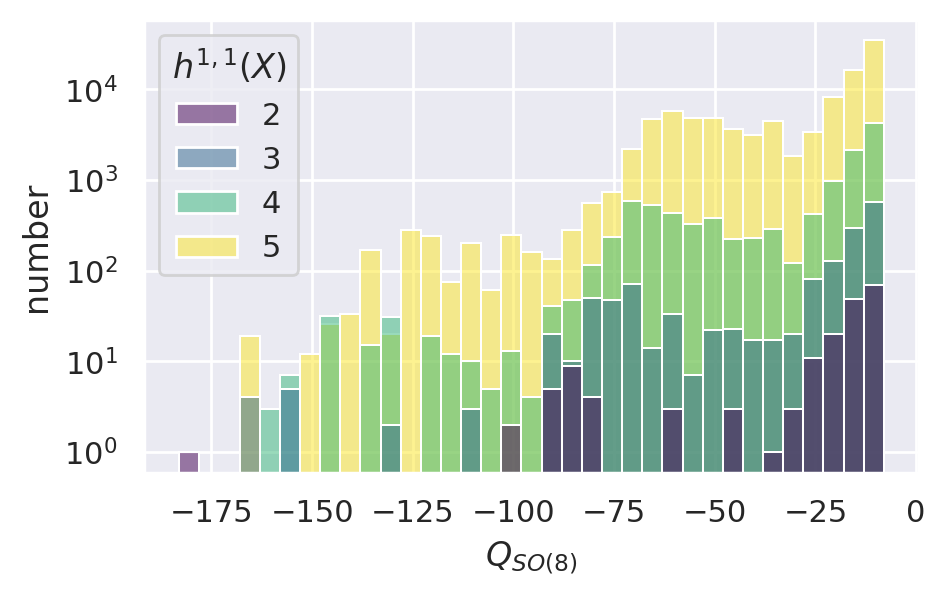

In [29]:
plt.figure(figsize=(5,3))

ax=sn.histplot(data=df_WD,x="D3SO8",hue="h11X",palette=cmap,legend=True,binwidth=5);

ax.set(xlabel='$Q_{SO(8)}$', ylabel='number')

legend = ax.get_legend()
handles = legend.legendHandles
legend.remove()
ax.legend(handles, np.unique(df["h11X"]), title='$h^{1,1}(X)$')

plt.yscale('log')
plt.show()

## Plots for fully recomined Whitney brane

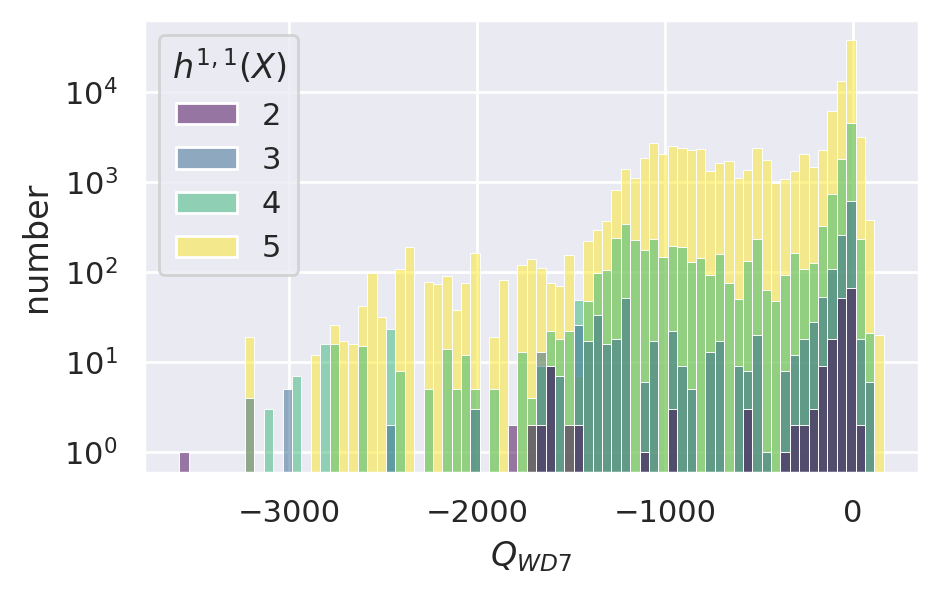

In [30]:
plt.figure(figsize=(5,3))

ax=sn.histplot(data=df_WD,x="D3W",hue="h11X",palette=cmap,legend=True,binwidth=50);

ax.set(xlabel='$Q_{WD7}$', ylabel='number')

legend = ax.get_legend()
handles = legend.legendHandles
legend.remove()
ax.legend(handles, np.unique(df["h11X"]), title='$h^{1,1}(X)$')

plt.yscale('log')
plt.show()